In [207]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### 1. Exploratory Data Analysis (EDA) on Target Variable

In [208]:
df = pd.read_csv(r"data\cleaned\preprocessed_data.csv")

In [209]:
df.columns

Index(['name', 'price', 'image', 'availability', 'description', 'url',
       'main_category', 'sub_category', 'description_list'],
      dtype='object')

### Chek categories distributions

##### 1. Check MainCategory Counts

In [210]:
df["main_category"].nunique()

9

In [211]:
# Check the product count per main_category
main_category_counts = df['main_category'].value_counts()
main_category_counts

main_category
Informatique             3213
Electroménager           2439
Bureautique              1293
TV-Son-Photos            1116
Impression                980
Réseau & Connectiques     604
Téléphonie & Tablette     602
Sécurité                  179
Stockage                   95
Name: count, dtype: int64

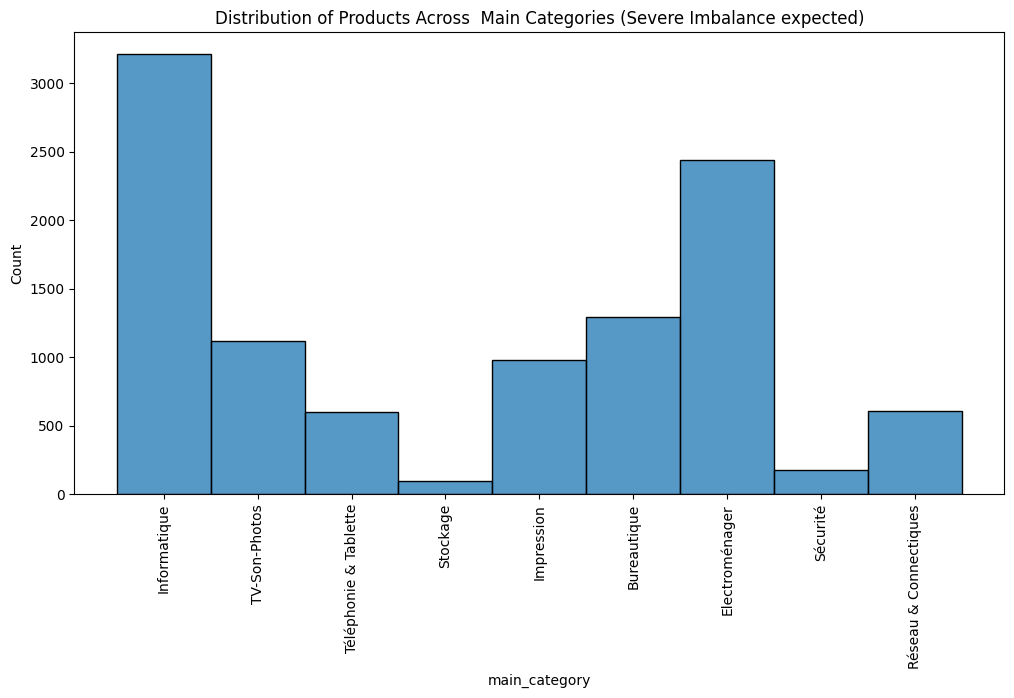

In [212]:
# Visualize the distribution of the  main categories
plt.figure(figsize=(12, 6))
sns.histplot(df['main_category'], kde=False)
plt.xticks(rotation=90)
plt.title('Distribution of Products Across  Main Categories (Severe Imbalance expected)')
plt.show()




C:\Users\lenovo\AppData\Local\Temp\ipykernel_10600\24040053.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=main_category_counts.index[:top_n], y=main_category_counts.values[:top_n], palette='viridis')


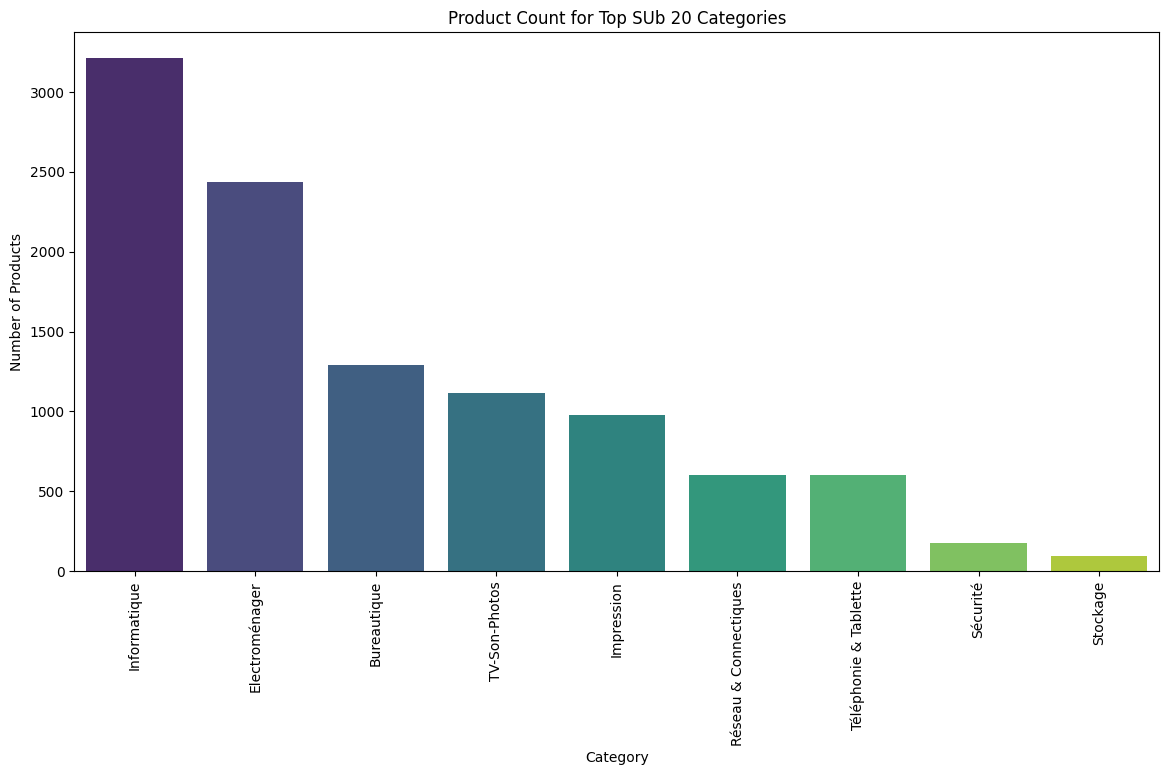

In [213]:
# Often, plotting only the top N categories is necessary for visualization
top_n = 20
plt.figure(figsize=(14, 7))
sns.barplot(x=main_category_counts.index[:top_n], y=main_category_counts.values[:top_n], palette='viridis')
plt.xticks(rotation=90)
plt.title(f'Product Count for Top SUb {top_n} Categories')
plt.ylabel('Number of Products')
plt.xlabel('Category')
plt.show()

##### 2. Check Sub Category Counts

In [214]:
df["sub_category"].nunique()

38

In [215]:

print("--- Initial Sub-Category Distribution ---")
category_counts = df['sub_category'].value_counts()
print(f"Total Unique Categories: {len(category_counts)}")

# Display the top and bottom of the distribution
print("\nTop 10 Most Frequent Categories:")
print(category_counts.head(10))
print("\nCategories with the fewest products (The 'Long Tail'):")
print(category_counts.tail(10))


--- Initial Sub-Category Distribution ---
Total Unique Categories: 38

Top 10 Most Frequent Categories:
sub_category
Accessoires et Périphériques    1214
Petit Electro Cuisine            801
Gros Electro Cuisine             791
Consommables                     766
Ordinateur de Bureau             730
Ordinateur Portable              655
Composant  Informatique          593
SON                              551
Entretien – Soin                 467
Accessoires Téléphones           398
Name: count, dtype: int64

Categories with the fewest products (The 'Long Tail'):
sub_category
Vidéoprojecteurs           66
Accessoires de bureau      60
Tablette Graphique         48
Appareils Photos           46
Photocopieurs              43
Logiciels                  21
Récepteur / Abonnement     21
Système d'alarme           16
Coffrets et Accessoires    12
Pack électroménager         3
Name: count, dtype: int64


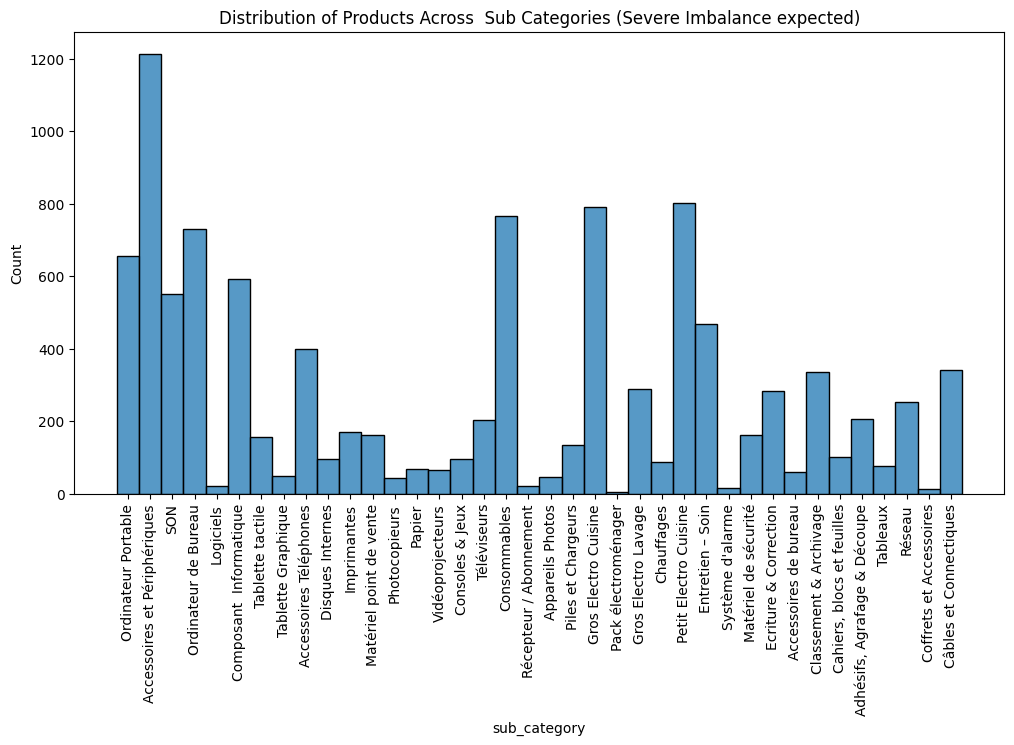

In [216]:
# Visualize the distribution of the  main categories
plt.figure(figsize=(12, 6))
sns.histplot(df['sub_category'], kde=False)
plt.xticks(rotation=90)
plt.title('Distribution of Products Across  Sub Categories (Severe Imbalance expected)')
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10600\91716461.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


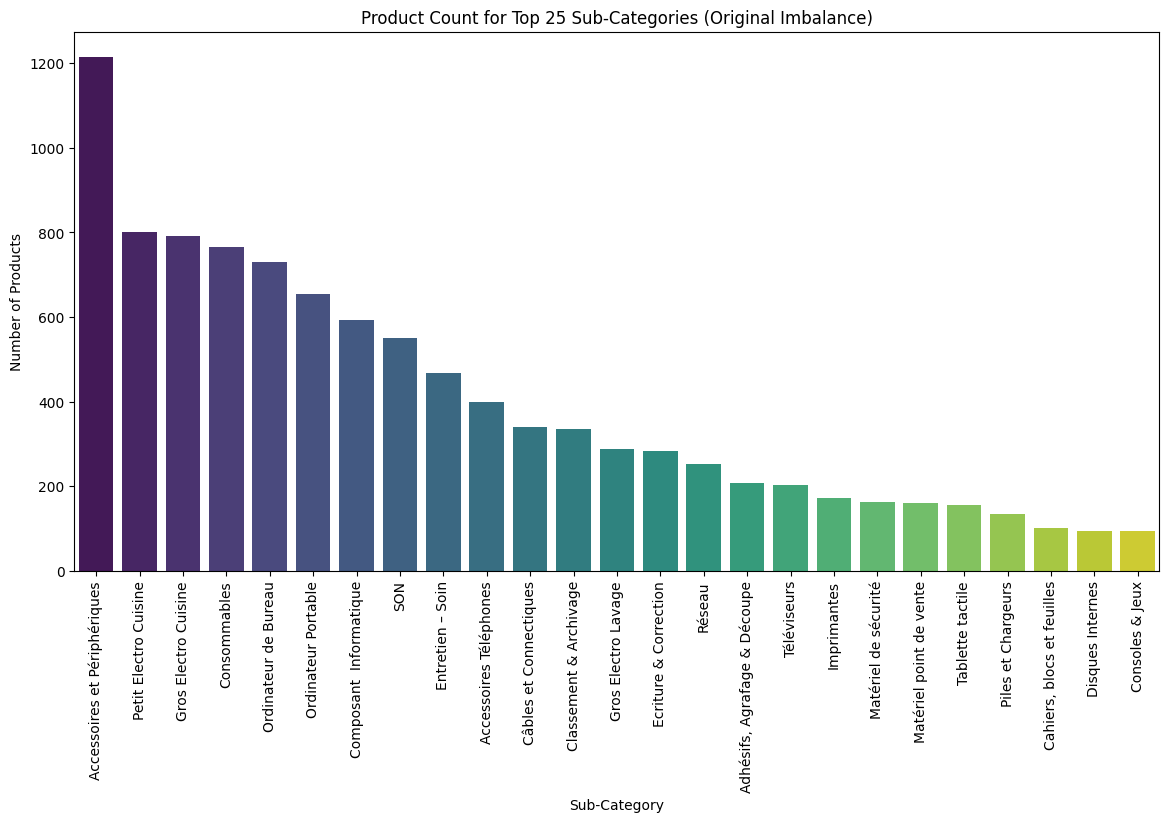

In [217]:

N = 25 
plt.figure(figsize=(14, 7))
sns.barplot(
    x=category_counts.index[:N], 
    y=category_counts.values[:N], 
    palette='viridis'
)
plt.xticks(rotation=90)
plt.title(f'Product Count for Top {N} Sub-Categories (Original Imbalance)')
plt.ylabel('Number of Products')
plt.xlabel('Sub-Category')
plt.show()

### 2. Feature Engineering and Matrix Creation

#### 2.1 Feature Engineering (Text)

In [218]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from scipy.sparse import hstack, csr_matrix

# -----------------
# 
# -----------------
# Combine all text features into a single column
# Use a space to join the list of description attributes
df['combined_text'] = df['name'] + ' ' + df['description']

# Initialize the TF-IDF Vectorizer
# Using bigrams and limiting features improves performance
tfidf = TfidfVectorizer(
    stop_words='english', 
    ngram_range=(1, 2),   
    max_features=10000    
)

# Fit and transform the text data
tfidf_matrix = tfidf.fit_transform(df['combined_text'])
print(f"\nTF-IDF Matrix Shape (Text Features): {tfidf_matrix.shape}")





TF-IDF Matrix Shape (Text Features): (10521, 10000)


#### 2.2 Feature Engineering (Numerical)

In [219]:

# Scale the 'price' feature
scaler = MinMaxScaler()
# Reshape the 'price' column for the scaler and scale it to [0, 1]
df['price_scaled'] = scaler.fit_transform(df['price'].values.reshape(-1, 1))

# Convert the scaled price into a sparse matrix for easy stacking
price_sparse = csr_matrix(df['price_scaled'].values.reshape(-1, 1))


#### 2.3 Prepare Target Variable (Y)

In [220]:

# Encode the cleaned target column into numerical IDs
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(df['main_category'])

#### 2.4 Final Feature Matrix (X)

In [ ]:
# Stack the Text features (TF-IDF) and the Numerical feature (Scaled Price)
X = hstack([tfidf_matrix, price_sparse])

print(f"\nFinal Feature Matrix Shape (X): {X.shape}")



Final Feature Matrix Shape (X): (10521, 10001)
Data Preparation Complete. Ready for Model Training.


print("Data Preparation Complete. Ready for Model Training.")